# Assignment 4(due on 12/06)

## Student:宋雨璇（12332310），Gtihub：zai-song


## 得分：20/30

### 第一题

In [7]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [8]:
data = pd.read_csv('usgs_earthquakes.csv')

In [9]:
data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake


In [10]:
data['time'] = pd.to_datetime(data['time'])

In [11]:
data_2014 = data[data['time'].dt.year == 2014].sort_values(by='mag', ascending=False).head(50)

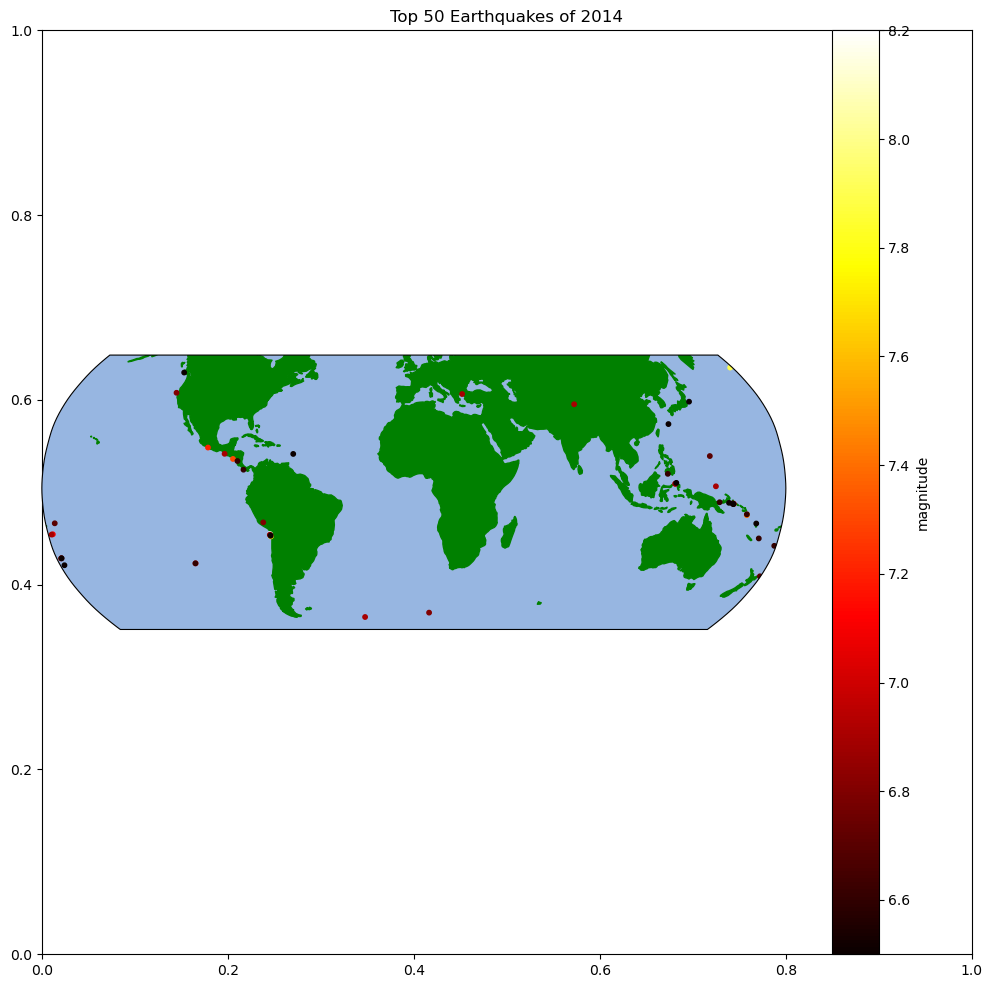

In [22]:
plt.figure(figsize=(12,12), dpi=100)
plt.title('Top 50 Earthquakes of 2014')
proj = ccrs.Robinson()
ax = plt.axes(projection=proj)
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.LAND, edgecolor='green', facecolor='green', zorder=0)
sc = ax.scatter(data_2014['longitude'], data_2014['latitude'], c=data_2014['mag'], cmap='hot',s=10,transform=ccrs.PlateCarree())
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('magnitude')
plt.show()


### 第一题代码运行正常，图件显示有些问题。助教提供参考代码，给您参考，代码来自朱昱光。
### 得分：10/10
### --------------------------------------------------------------------------------------------

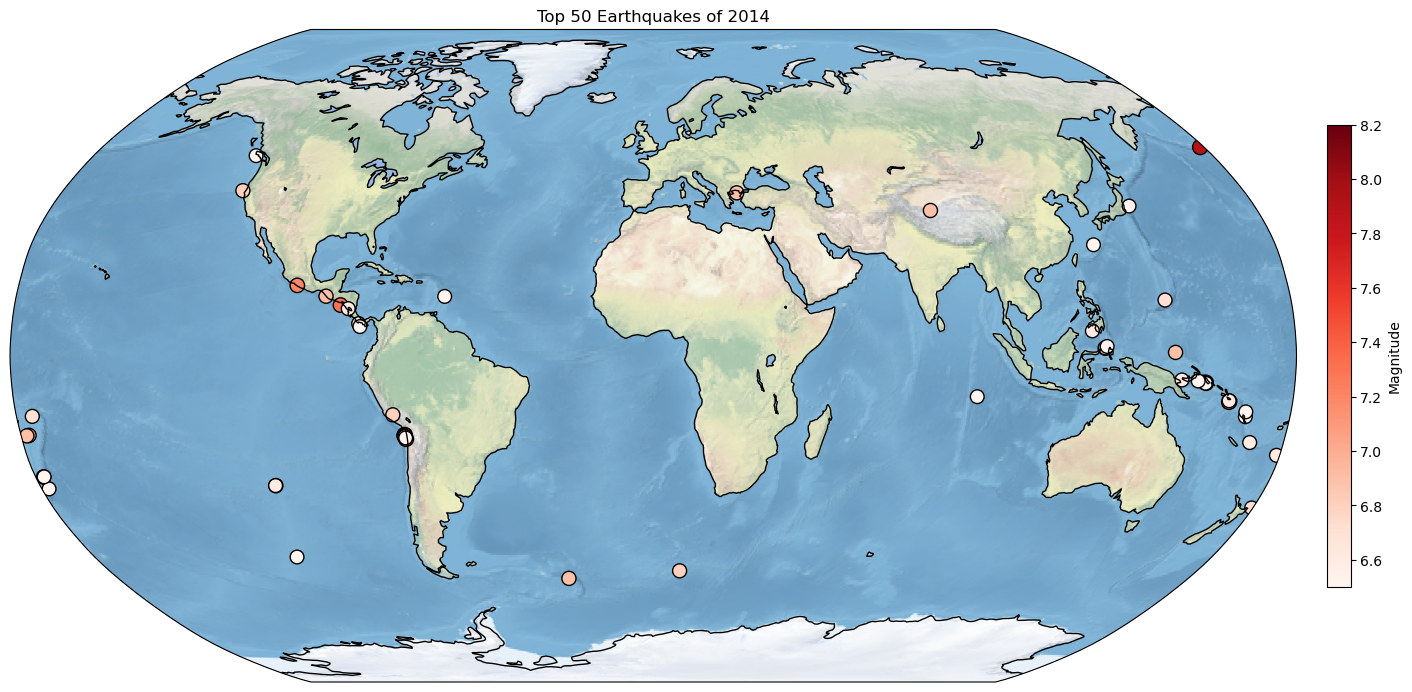

In [24]:
usgs_earthquakes=pd.read_csv("usgs_earthquakes.csv")

sorted_earthquakes = usgs_earthquakes.sort_values(by='mag', ascending=False)
top_earthquakes = sorted_earthquakes.head(50)

# 获取第50位的震级
min_mag_in_top = top_earthquakes.iloc[-1]['mag']

# 找到所有震级至少等于这个值的地震
top_earthquakes_extended = sorted_earthquakes[sorted_earthquakes['mag'] >= min_mag_in_top]

# 设置画布和图坐标系，并添加世界地图背景
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': ccrs.Robinson()})
ax.set_global()
ax.stock_img()
# 设置全局视图

# 给地图添加特征
ax.add_feature(cfeature.COASTLINE)  # 添加海岸线
ax.add_feature(cfeature.LAND, edgecolor='black')  # 添加陆地，设置边缘颜色为黑色
ax.add_feature(cfeature.LAKES, edgecolor='black')  # 添加湖泊，设置边缘颜色为黑色
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor=cfeature.COLORS['water'])  # 添加海洋，设置边缘颜色为黑色，填充颜色为水蓝色


# 绘制地震点

sc = ax.scatter(top_earthquakes_extended['longitude'], top_earthquakes_extended['latitude'],
                c=top_earthquakes_extended['mag'], cmap='Reds',marker='o', s=top_earthquakes_extended['mag']*15,
                alpha=1, edgecolors='black', transform=ccrs.Geodetic())

# 添加颜色条
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02, shrink=0.6)
cbar.set_label('Magnitude')

# 添加标题
plt.title('Top 50 Earthquakes of 2014')

# 显示图像
plt.show()

### 第二题

In [13]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [14]:
data2 = xr.open_dataset("precip.mon.total.1x1.v7.nc", engine="netcdf4")

In [15]:
data2['lon']=data2['lon']-180

In [16]:
variable = data2.precip.mean(dim='time')

In [17]:
data2

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1356)
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * time     (time) datetime64[ns] 1901-01-01 1901-02-01 ... 2013-12-01
Data variables:
    precip   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Original_Source:  http://www.dwd.de/en/FundE/Klima/KLIS/int/GPCC/GPCC.htm...
    Reference:        Users of the data sets are kindly requested to give fee...
    original_source:  ftp://ftp-anon.dwd.de/pub/data/gpcc/html/download_gate....
    Conventions:      CF 1.0
    history:          Created 01/2016 based on V7 data obtained via ftp
    title:            GPCC Full Data Reanalysis Version 7 1.0x1.0 Monthly Totals
    dataset_title:    Global Precipitation Climatology Centre (GPCC)
    References:       http://www.psl.noaa.gov/data/gridded/data.gpcc.html

Text(0.5, 1.0, '全球月降水数据')

d:\software\anaconda\envs\TA\lib\site-packages\cartopy\mpl\geoaxes.py:541: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from current font.
  super()._update_title_position(renderer)
d:\software\anaconda\envs\TA\lib\site-packages\cartopy\mpl\geoaxes.py:541: UserWarning: Glyph 29699 (\N{CJK UNIFIED IDEOGRAPH-7403}) missing from current font.
  super()._update_title_position(renderer)
d:\software\anaconda\envs\TA\lib\site-packages\cartopy\mpl\geoaxes.py:541: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  super()._update_title_position(renderer)
d:\software\anaconda\envs\TA\lib\site-packages\cartopy\mpl\geoaxes.py:541: UserWarning: Glyph 38477 (\N{CJK UNIFIED IDEOGRAPH-964D}) missing from current font.
  super()._update_title_position(renderer)
d:\software\anaconda\envs\TA\lib\site-packages\cartopy\mpl\geoaxes.py:541: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from current font.
  super()._update_title_posi

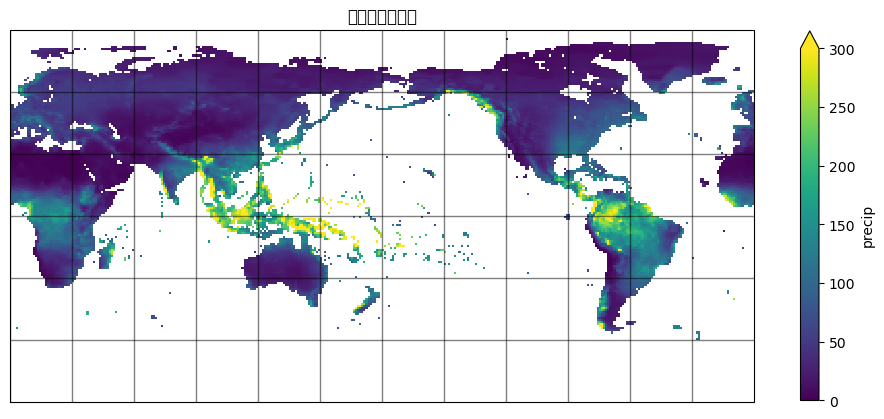

In [18]:
plt.figure(figsize=(12,12), dpi=100)
proj = ccrs.PlateCarree() 
ax   = plt.axes(projection=proj)
variable.plot(ax=ax, transform=ccrs.PlateCarree(),vmin=0, vmax=300, cbar_kwargs={'shrink': 0.4})
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))
plt.title("全球月降水数据")

In [19]:
variable2=variable.sel(lon=slice(0, 180))

Text(0.5, 1.0, '东半球月降水数据')

d:\software\anaconda\envs\TA\lib\site-packages\cartopy\mpl\geoaxes.py:541: UserWarning: Glyph 19996 (\N{CJK UNIFIED IDEOGRAPH-4E1C}) missing from current font.
  super()._update_title_position(renderer)
d:\software\anaconda\envs\TA\lib\site-packages\cartopy\mpl\geoaxes.py:541: UserWarning: Glyph 21322 (\N{CJK UNIFIED IDEOGRAPH-534A}) missing from current font.
  super()._update_title_position(renderer)
d:\software\anaconda\envs\TA\lib\site-packages\cartopy\mpl\geoaxes.py:541: UserWarning: Glyph 29699 (\N{CJK UNIFIED IDEOGRAPH-7403}) missing from current font.
  super()._update_title_position(renderer)
d:\software\anaconda\envs\TA\lib\site-packages\cartopy\mpl\geoaxes.py:541: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  super()._update_title_position(renderer)
d:\software\anaconda\envs\TA\lib\site-packages\cartopy\mpl\geoaxes.py:541: UserWarning: Glyph 38477 (\N{CJK UNIFIED IDEOGRAPH-964D}) missing from current font.
  super()._update_title_posi

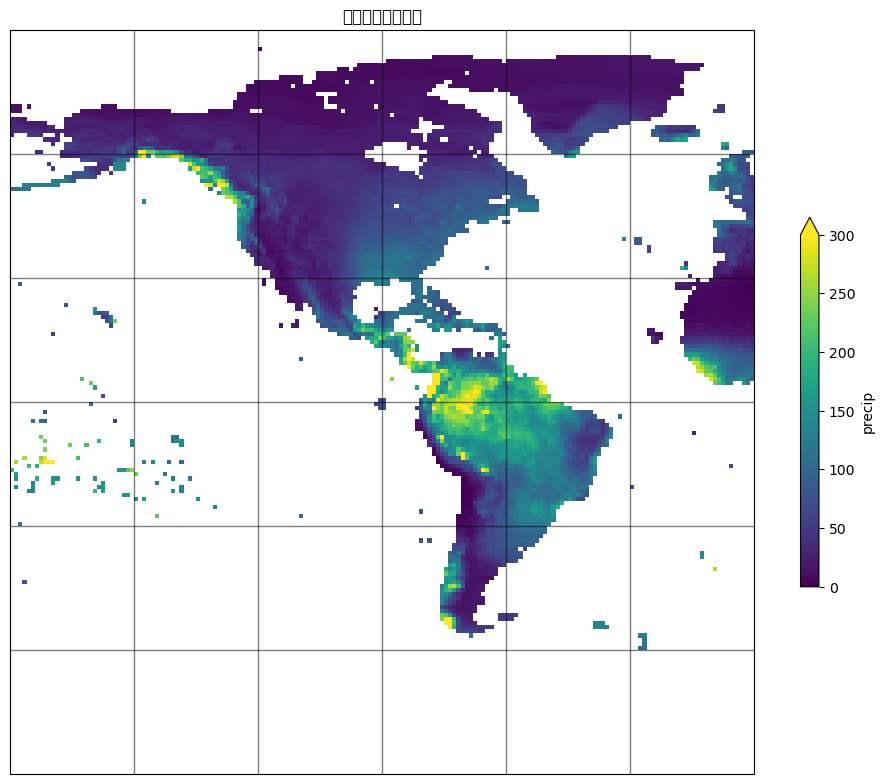

In [20]:
plt.figure(figsize=(12,12), dpi=100)
proj = ccrs.PlateCarree() 
ax   = plt.axes(projection=proj)
variable2.plot(ax=ax, transform=ccrs.PlateCarree(),vmin=0, vmax=300, cbar_kwargs={'shrink': 0.4})
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(0, 180, 30))
plt.title("东半球月降水数据")

### 第二题代码可运行，图件包含网格线、标题、颜色条。标题不支持中文显示。需要补充其他和要素。
### 助教提供参考代码，给您参考，代码来自郑各希。
### 得分：10/20
### --------------------------------------------------------------------------------------------

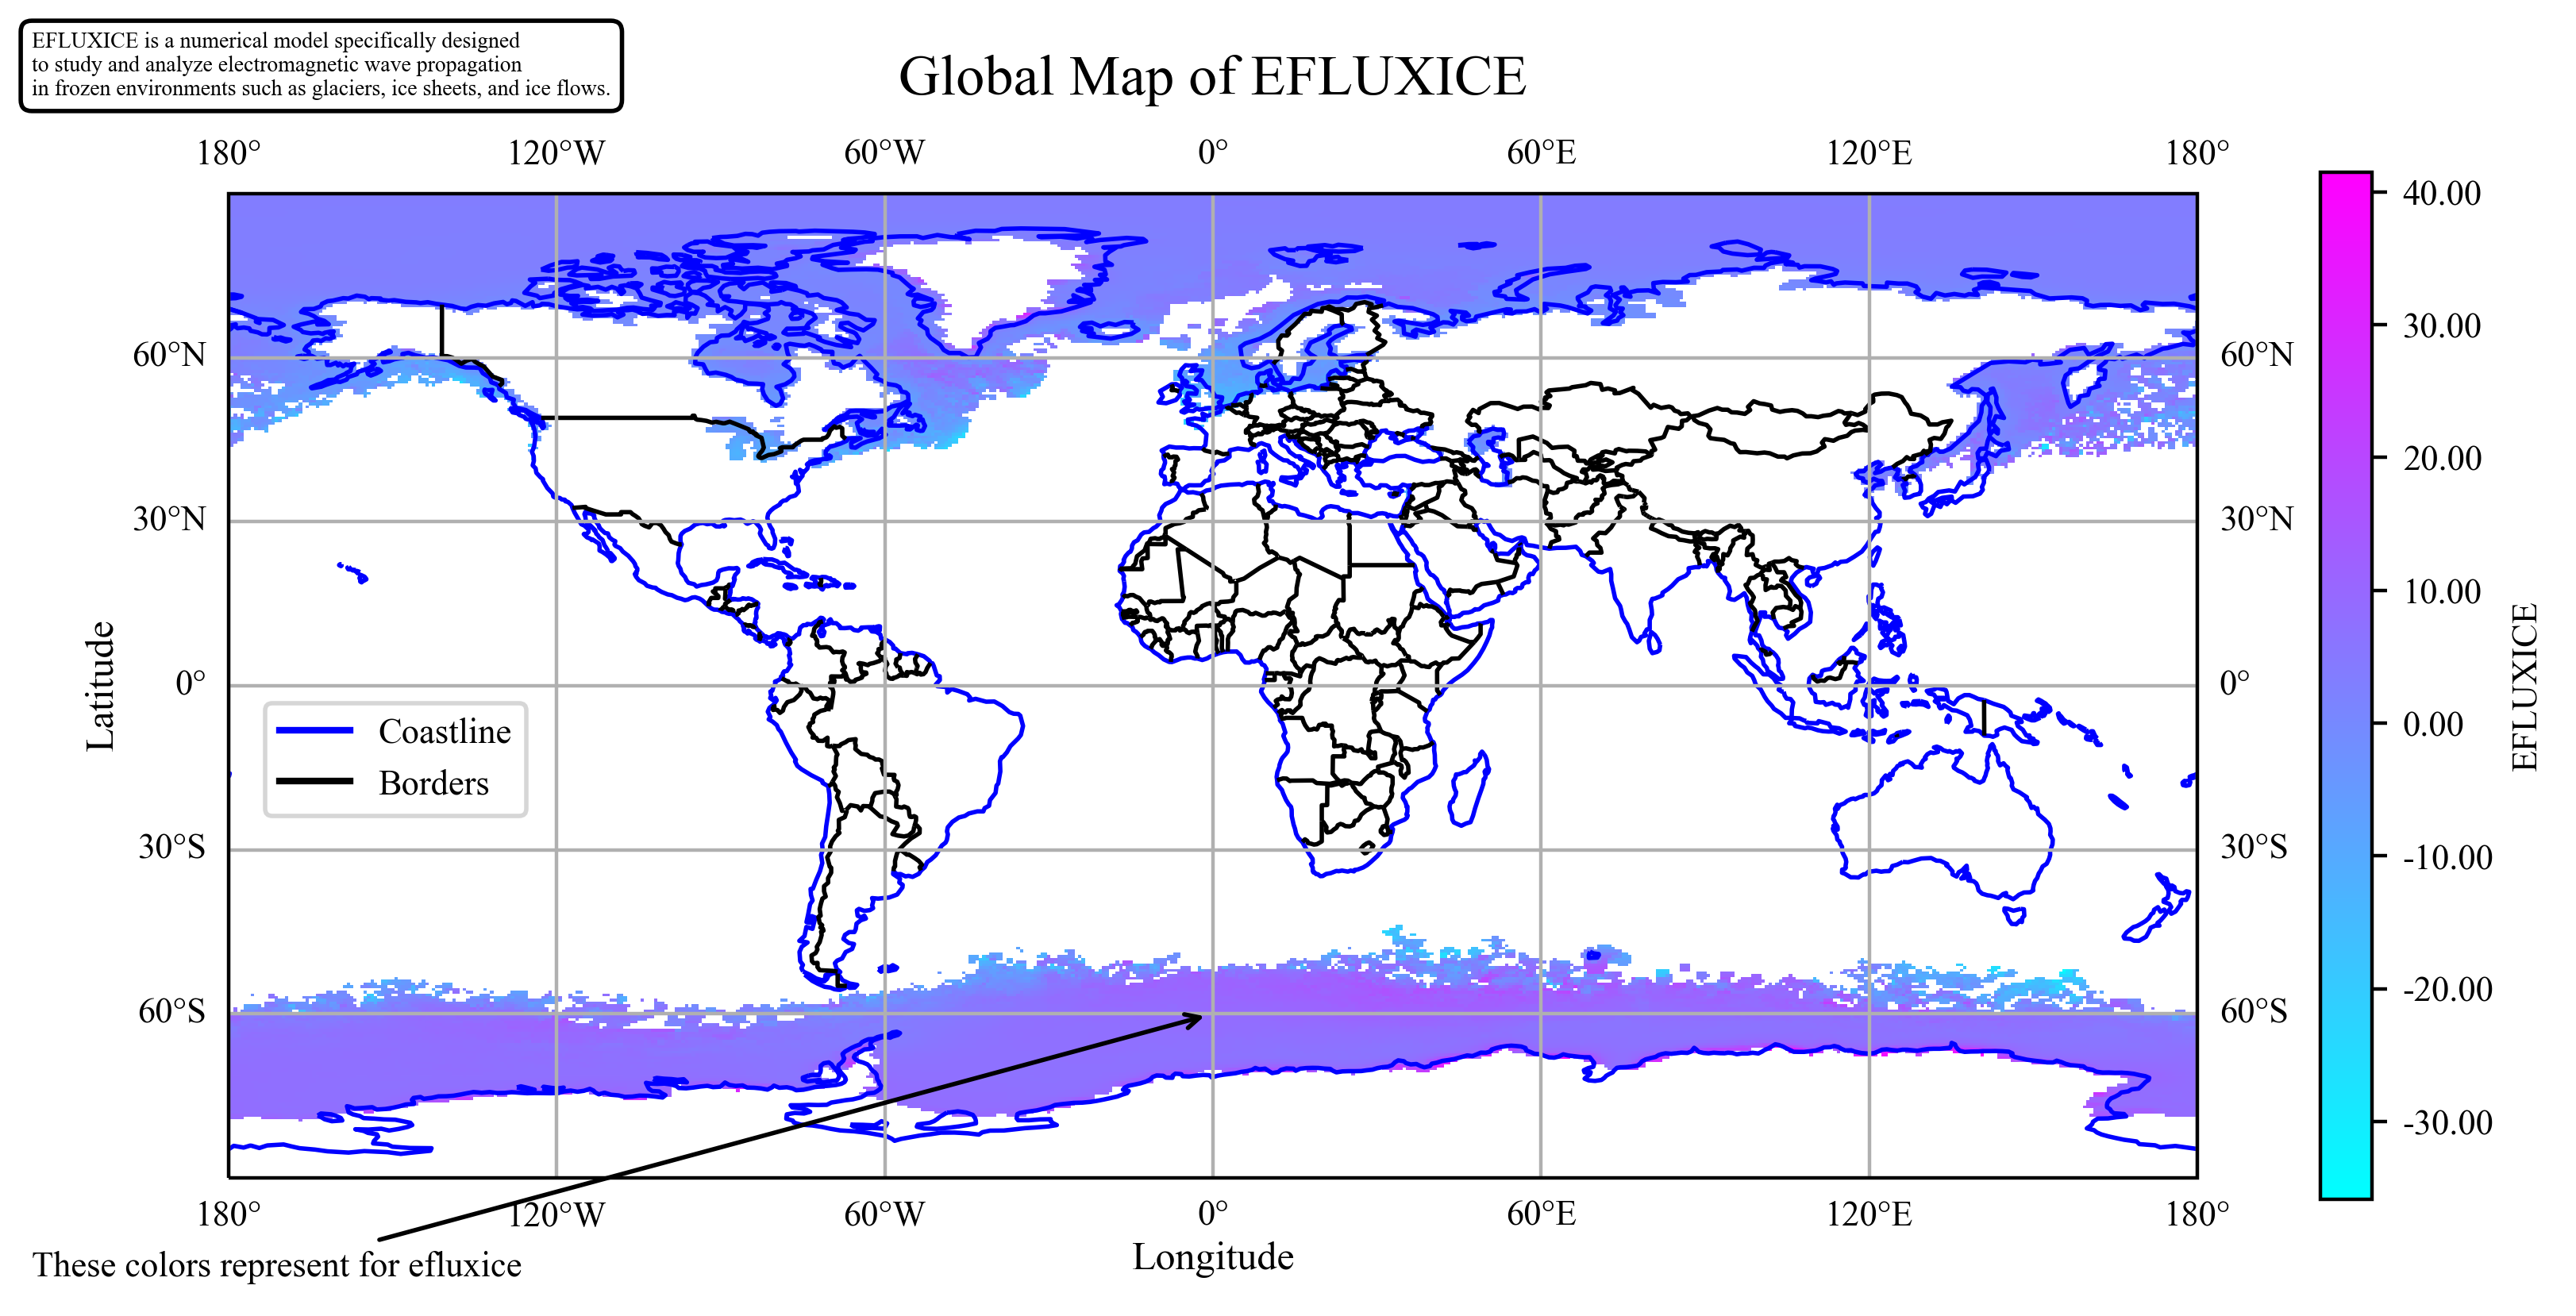

In [ ]:
#2.1
#选择EFLUXICE变量
efluxice = glacier_data['EFLUXICE'].mean(dim='time')

#创建画布和子图
fig = plt.figure(figsize=(10, 6), dpi=400)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

#画图，运用pcolormesh函数（从matplotlib网站学习，特别适合画经纬度的图）
global_map = ax.pcolormesh(efluxice['lon'], efluxice['lat'], efluxice, transform=ccrs.PlateCarree(), cmap='cool')

#添加地图特征
coastline = ax.add_feature(cfeature.COASTLINE, edgecolor='blue',label='coastline')
borders = ax.add_feature(cfeature.BORDERS, edgecolor='black',label='borders')

#添加网格线和刻度
gl = ax.gridlines(draw_labels=True)
gl.xlabel_style = {'size': 8, 'fontname': 'Times New Roman'}
gl.ylabel_style = {'size': 8, 'fontname': 'Times New Roman'}

#设置坐标轴标题，因为cartopy没有自带坐标轴标题，所以要通过text函数来添加
ax.text(0, -105, 'Longitude', ha='center', va='center', fontsize=9, fontname='Times New Roman')
ax.text(-203, 0, 'Latitude', ha='center', va='center', rotation='vertical', fontsize=9, fontname='Times New Roman')

#设置标题
ax.set_title('Global Map of EFLUXICE', fontsize=13,fontname='Times New Roman',pad=10)

#添加colorbar
cbar = fig.colorbar(global_map, ax=ax, shrink=0.7,pad=0.05)
cbar.set_label('EFLUXICE', fontsize=8, fontname='Times New Roman')

#设置 colorbar 的刻度标签的字体大小和字体样式，根据报错：UserWarning: FixedFormatter should only be used together with FixedLocator学习
locations = cbar.ax.get_yticks()
cbar.ax.yaxis.set_major_locator(plt.FixedLocator(locations))
cbar.ax.set_yticklabels([f'{tick:.2f}' for tick in locations], fontsize=8, fontname='Times New Roman')

#添加注释和文本框
ax.annotate('These colors represent for efluxice', xy=(0, -60), xytext=(-0.1, -0.1), textcoords='axes fraction', arrowprops=dict(arrowstyle='->'), fontsize=8, fontname='Times New Roman')
ax.text(-0.1, 1.1, 'EFLUXICE is a numerical model specifically designed\nto study and analyze electromagnetic wave propagation\nin frozen environments such as glaciers, ice sheets, and ice flows.', transform=ax.transAxes, fontsize=5, fontname='Times New Roman',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

#为地图特征添加图例，因为cartopy没有自带图例，所以要通过用matplotlib创建两个不显示的颜色线的函数来创建图例
plt.plot([], [], color='blue', label='Coastline')
plt.plot([], [], color='black', label='Borders')
plt.legend(loc='lower right', prop={'size': 8, 'family': 'Times New Roman'},bbox_to_anchor=(0.16, 0.35))

plt.show()

